In [2]:
import pandas as pd
import numpy as np
import config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from pipeline.training.data_manager import _X_feature_selector, _y_feature_selector
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(f'{config.TRAINING_DATA_PATH}/dataset.csv')

In [3]:
X = data[_X_feature_selector(data)]
y = data[_y_feature_selector()]

In [4]:
# plt.hist(X['ctrl_per_min_mean_red'][~X['ctrl_per_min_mean_red'].isna()], bins=70)
# plt.show()

In [5]:
# imp = IterativeImputer(max_iter=10, random_state=77)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X = imp.fit_transform(X)

In [6]:
individual_fighter_off_cols = ['td_mean_red', 'td_per_min_mean_red', 'sub_att_per_min_mean_red', 'td_accuracy_mean_red', 'td_att_trend_mean_red', 
                               'td_trend_mean_red', 'ctrl_diff_mean_red', 'ctrl_mean_red', 'ctrl_per_min_mean_red', ]

In [7]:
# """ Do t-SNE on dataset """
# individual_fighter_cols = list(filter(lambda x: 'ctrl' in x or 'sub' in x or 'td' in x, filter(lambda x: x.endswith('_red'), X.columns)))
# print (individual_fighter_cols)
# individual_fighter_data = X[individual_fighter_cols].apply(lambda x: (x - x.mean()) / x.std())
# imputed_individual_fighter_data = imp.fit_transform(individual_fighter_data)

# X_embedded = TSNE(n_components=2, learning_rate='auto', 
#                   init='random', perplexity=3).fit_transform(imputed_individual_fighter_data)

# tsne_df = pd.DataFrame()
# tsne_df['y'] = y
# tsne_df['comp-1'] = X_embedded[:,0]
# tsne_df['comp-2'] = X_embedded[:,1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
#                 palette=sns.color_palette("hls", 2),
#                 data=tsne_df).set(title="UFC Fighters t-SNE Projection")

In [25]:
def plot_feature_importance(feature: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    x = X.dropna(subset=[feature])[feature]
    x = (x - x.mean()) / (x.std())
    outcome = y.loc[x.index]
    coef = np.polyfit(x, outcome, 1)
    poly1d_fn = np.poly1d(coef) 
    print (f'{feature}: m = {coef[0]}, b = {coef[1]}')
    sns.violinplot(x=x, y=outcome, orient='h', order=[1,0], ax=ax1)
    ax1.plot(x, poly1d_fn(x))
    ax2.hist(x, bins=30)
    plt.show()
    plt.clf()
    return coef

In [26]:
data[data['fighter_red'] == 'Tim Elliott']['td_per_min_mean_red']

3339          NaN
3778     0.000000
4264     0.233333
4459     0.288889
4842     0.250000
5634     0.345161
7284     0.298746
7628     0.278925
7744     0.344059
8291     0.305830
10008    0.290210
10211    0.292841
10460    0.285104
10599    0.300244
11240    0.283560
11832    0.282434
12205    0.268948
13236    0.264893
Name: td_per_min_mean_red, dtype: float64

td_mean_red: m = 0.03684484353869013, b = 0.5093619972260746


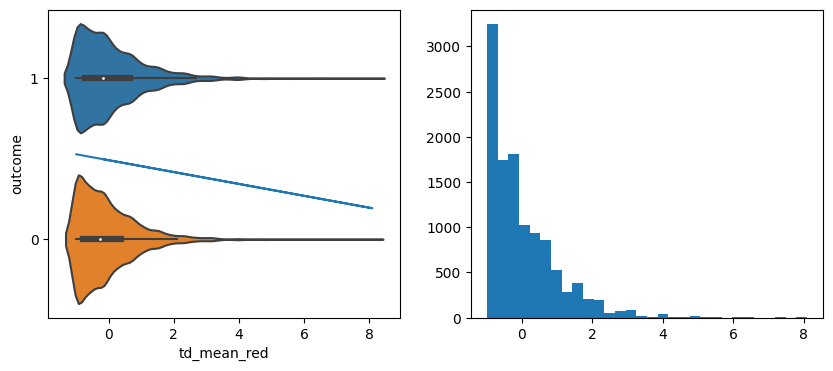

td_per_min_mean_red: m = 0.029597052049544055, b = 0.5094356106936924


<Figure size 640x480 with 0 Axes>

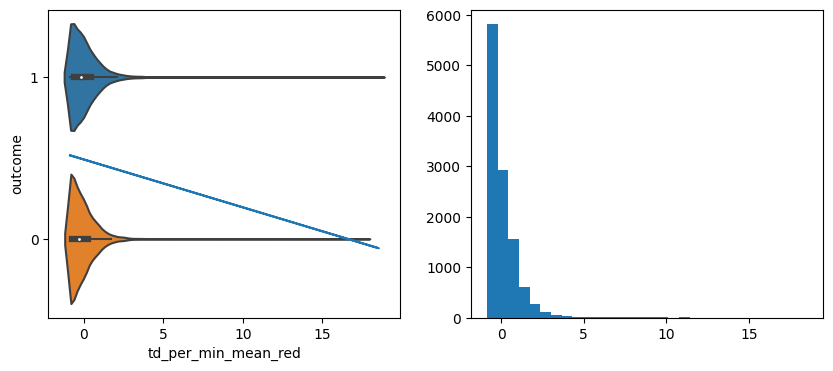

sub_att_per_min_mean_red: m = -0.0034190491091218925, b = 0.5094356106936924


<Figure size 640x480 with 0 Axes>

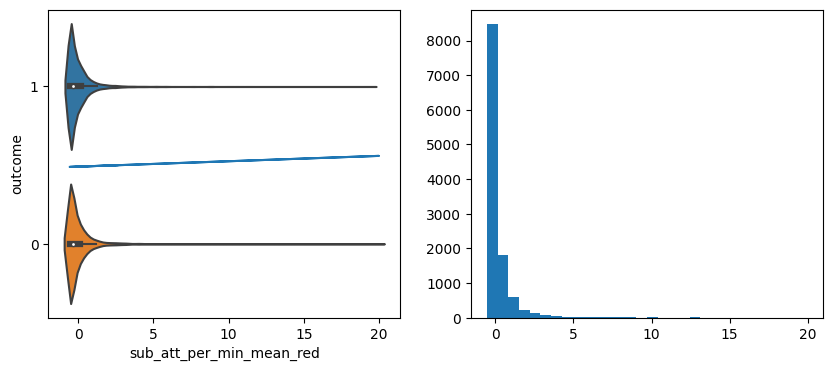

td_accuracy_mean_red: m = 0.01576995437750424, b = 0.5126996344044645


<Figure size 640x480 with 0 Axes>

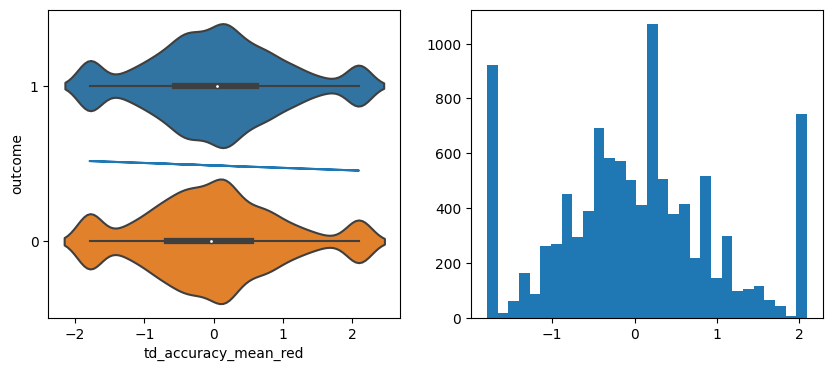

td_att_trend_mean_red: m = -0.002586826746231855, b = 0.5093619972260752


<Figure size 640x480 with 0 Axes>

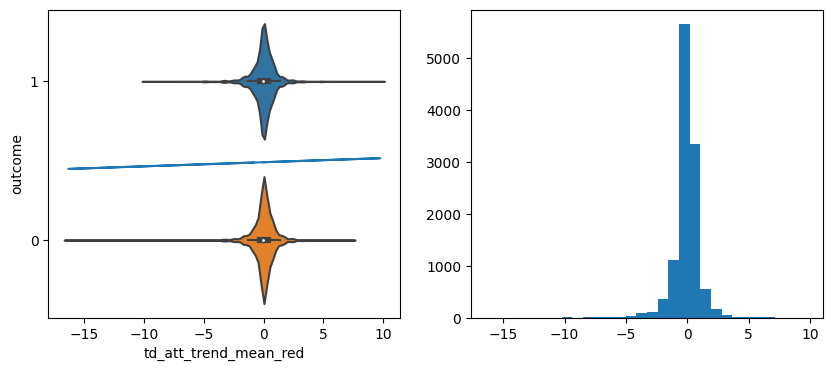

td_trend_mean_red: m = 0.004865256869350317, b = 0.5093619972260738


<Figure size 640x480 with 0 Axes>

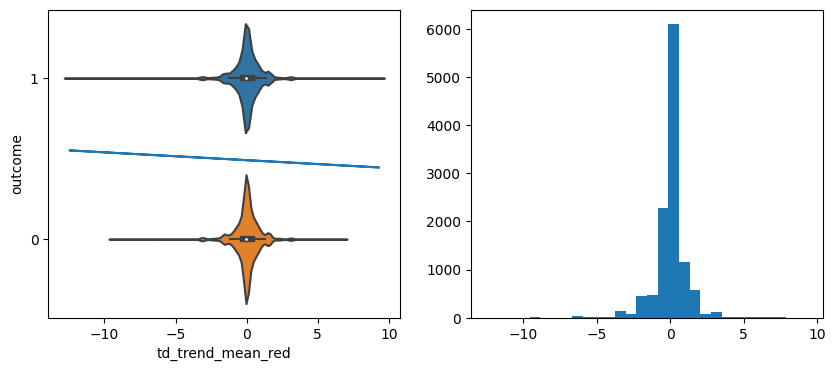

ctrl_diff_mean_red: m = 0.035410875502453254, b = 0.5093619972260747


<Figure size 640x480 with 0 Axes>

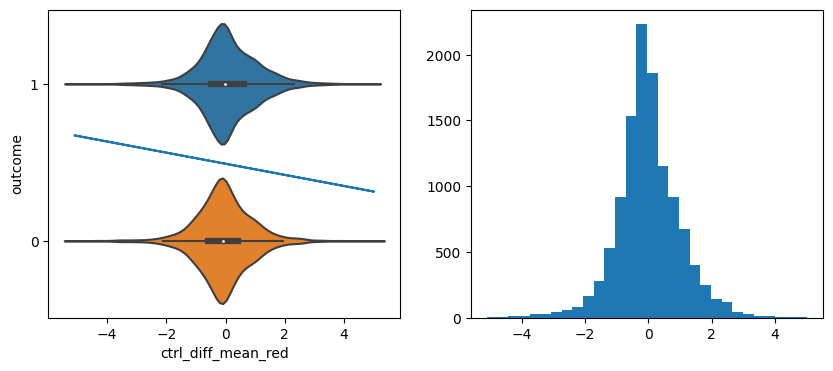

ctrl_mean_red: m = 0.028211563959510487, b = 0.5093619972260752


<Figure size 640x480 with 0 Axes>

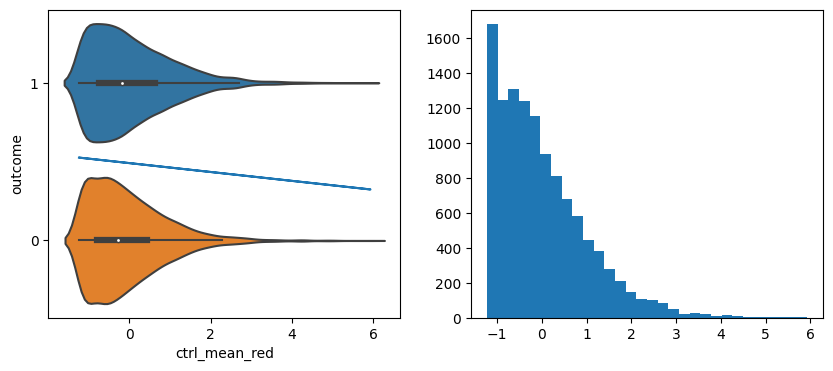

ctrl_per_min_mean_red: m = 0.030590739819872127, b = 0.5094356106936919


<Figure size 640x480 with 0 Axes>

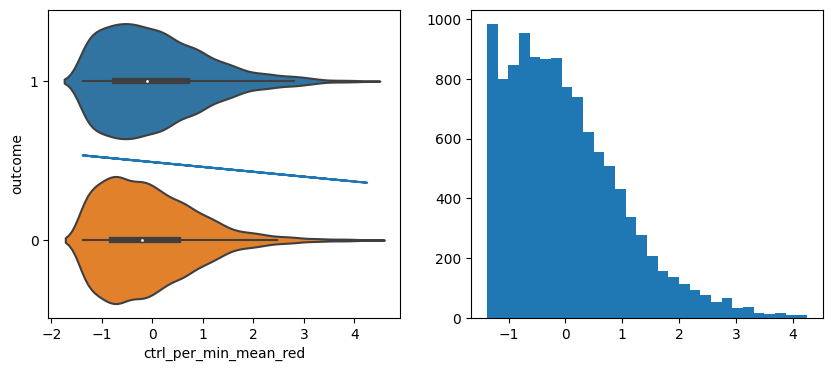

<Figure size 640x480 with 0 Axes>

In [27]:
for i in individual_fighter_off_cols:
    plot_feature_importance(i)

days_since_last_fight_red: m = -0.01788826603973206, b = 0.5093619972260748


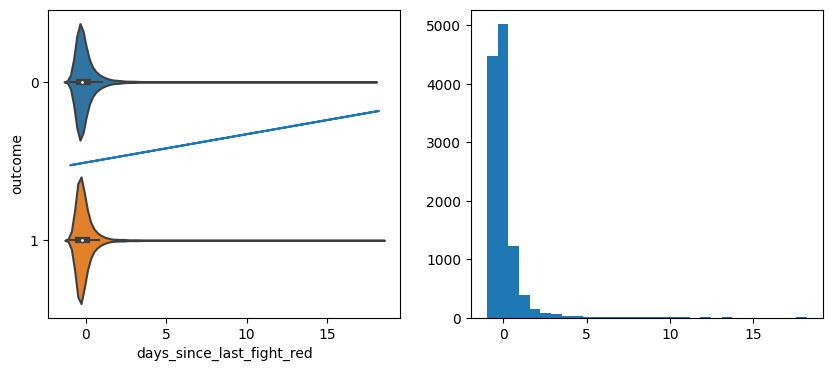

array([-0.01788827,  0.509362  ])

<Figure size 640x480 with 0 Axes>

In [24]:
plot_feature_importance('days_since_last_fight_red')

In [12]:
""" Do principal component analysis on the dataset """
pca = PCA(n_components=10)
transformed_data = pca.fit_transform(imputed_X)
print (pca.get_feature_names_out)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# transformed_data.head()

<bound method ClassNamePrefixFeaturesOutMixin.get_feature_names_out of PCA(n_components=10)>
